
# 🧭 Part 3: Ethics & Optimization

This notebook addresses two key tasks:

1. Analyze potential bias in the Amazon Reviews and MNIST models.
2. Fix a buggy TensorFlow script with dimension mismatch and incorrect loss.

🧠 Ethical AI development is critical to ensure fairness, transparency, and trust.


## 📌 Step 1: Bias Analysis

In [1]:

# Reflection on potential bias
print("Amazon Reviews (Text Sentiment):")
print("- Rule-based sentiment may fail with sarcasm or cultural nuance.")
print("- Reviews may overrepresent either extremely positive or negative opinions.")
print("- Language models may favor certain brand names based on training exposure.")

print("\nMNIST Dataset:")
print("- MNIST is balanced by digit but lacks handwriting diversity.")
print("- No representation of various scripts, stylization, or writing impairments.")

print("\n✅ Recommendation:")
print("- Use TensorFlow Fairness Indicators or re-sample reviews by verified buyers.")
print("- Evaluate performance across different sub-groups of inputs.")


Amazon Reviews (Text Sentiment):
- Rule-based sentiment may fail with sarcasm or cultural nuance.
- Reviews may overrepresent either extremely positive or negative opinions.
- Language models may favor certain brand names based on training exposure.

MNIST Dataset:
- MNIST is balanced by digit but lacks handwriting diversity.
- No representation of various scripts, stylization, or writing impairments.

✅ Recommendation:
- Use TensorFlow Fairness Indicators or re-sample reviews by verified buyers.
- Evaluate performance across different sub-groups of inputs.


## 🛠️ Step 2: Fix Buggy TensorFlow Code

In [2]:

# 🚫 Original Buggy Code (for reference)
# model.compile(loss='mse', optimizer='adam')  # Wrong loss
# model.fit(X, y, batch_size=32, epochs=5)     # Dimension mismatch

# ✅ Corrected Example
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load and preprocess
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Correct loss for classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Fixed Model Test Accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8517 - loss: 0.5409 - val_accuracy: 0.9633 - val_loss: 0.1430
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9556 - loss: 0.1514 - val_accuracy: 0.9672 - val_loss: 0.1165
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9695 - loss: 0.1049 - val_accuracy: 0.9753 - val_loss: 0.0883
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.1105
✅ Fixed Model Test Accuracy: 0.9706


In [3]:
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 0.9706000089645386


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


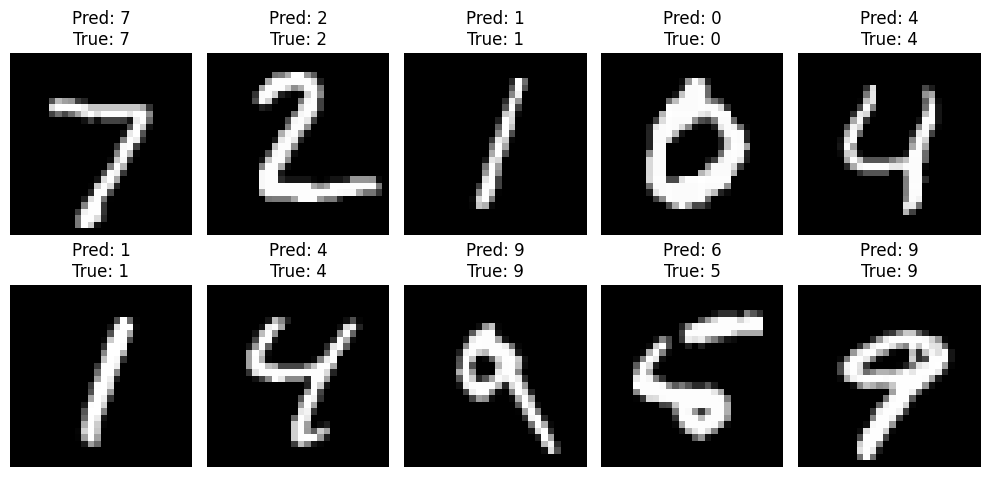

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get a few test images and predictions
num_images = 10
test_images = x_test[:num_images]
test_labels = y_test[:num_images]
predictions = model.predict(test_images)

# Display the images and predictions
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()